In [26]:

import gensim
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap



### Import word embedding

In [2]:
#ruta_word_embedding = '../data/wiki.multi.en.vec'
#ruta_word_embedding = '../data/embedding_english__europe_northamerica_word2vec_300dimensions_cbow_trim3_epoch50.bin'
ruta_word_embedding = '../data/embedding_english_europe_northamerica_word2vec_300dimensions_cbow_trim3_epoch50.model'
wordembedding = gensim.models.Word2Vec.load(ruta_word_embedding)
#wordembedding = KeyedVectors.load_word2vec_format(ruta_word_embedding, binary=False)
#wordembedding = KeyedVectors.load_word2vec_format(ruta_word_embedding, binary=True)

In [3]:
#iterate over topics in the same way than appears in the google sheets
#Do this only if we are getting the topics from a GENSIM LDA MODEL
def get_new_order_topic(prepared_data):
    new_order_prensa_pacifico = []
    for i in range(len(prepared_data['topic.order'])): 
        #FIND index topic i+1
        current_index = prepared_data['topic.order'].index(i+1)+1
        new_order_prensa_pacifico.append(current_index)
    return new_order_prensa_pacifico
    #ahora se itera sobre new_order para que calcen los numeros con google sheets
    

In [4]:
#word embedding topic similarity metric
#metrica correcta
def distance_topic_i_j(terms_list_i,terms_list_j):
    total_distances_topic_i = 0.0
    not_found_terms = set()
    for term_i in terms_list_i:
        if term_i in wordembedding.wv:
            dist_for_term_i = []
            for term_j in terms_list_j:
                if term_j in wordembedding.wv:
                    dist_for_term_i.append(wordembedding.wv.distance(term_i,term_j))
                    #print(term_i,term_j)
                    #dist_for_term_i.append(wordembedding.similarity(term_i,term_j))
                else:
                    not_found_terms.add(term_j)
            total_distances_topic_i+=min(dist_for_term_i)
        else:
            print("Not found",term_i, "in terms lists", terms_list_i)
            not_found_terms.add(term_i)
    #print("total distance",total_distances_topic_i )
    if len(not_found_terms)>0:
        print("Not found", not_found_terms)
    return total_distances_topic_i


In [38]:
def generar_matrix_baseline_metric( tinfo_collection_1, tinfo_collection_2, prepared_data_topic_1, prepared_data_topic_2, relevance_score = 1.0, topn=20):
    #calculate relevance according to the user parameter
    tinfo_collection_1['relevance'] = relevance_score * tinfo_collection_1['logprob']+ (1.00-relevance_score)*tinfo_collection_1['loglift']
    tinfo_collection_2['relevance'] = relevance_score * tinfo_collection_2['logprob']+ (1.00-relevance_score)*tinfo_collection_2['loglift']
    
    matrix = []
    i=0
    
    #new_order_topics_i = get_new_order_topic(topic_model_i) This is not necessary animore, because it get the topics from Prepared data and not from LDA GENSIM MODEL
    for topic_id_i in range(len(prepared_data_topic_1['topic.order'])):
        row=[]
        terms_list_i = tinfo_collection_1.loc[tinfo_collection_1['Category'] == 'Topic'+str(topic_id_i+1)].sort_values(by='relevance', ascending=False)['Term'][:topn]
        
        for topic_id_j in range(len(prepared_data_topic_2['topic.order'])):
            terms_list_j = tinfo_collection_2.loc[tinfo_collection_2['Category'] == 'Topic'+str(topic_id_j+1)].sort_values(by='relevance', ascending=False)['Term'][:topn]
            print(topic_id_i, topic_id_j, terms_list_i[:3].tolist(), terms_list_j[:3].tolist())
            row.append(distance_topic_i_j(terms_list_i,terms_list_j))
        matrix.append(row)
    i+=1
    matrix = np.asarray(matrix)
    return matrix

### Import data


In [39]:

with open('../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411_prepared_data_dict_with_more_info', 'rb') as f:
    PreparedData_dict_with_more_info_collection_1 = pickle.load(f)
topic_order_1 = PreparedData_dict_with_more_info_collection_1['topic.order']
tinfo_collection_1 = pd.DataFrame.from_dict(PreparedData_dict_with_more_info_collection_1['tinfo'])

In [40]:

with open('../data/cambridge_analytica/regional_datasets/files_northamerica/english_northamerica_tweets_20190411_prepared_data_dict_with_more_info', 'rb') as f:
    PreparedData_dict_with_more_info_collection_2 = pickle.load(f)
topic_order_2 = PreparedData_dict_with_more_info_collection_2['topic.order']
tinfo_collection_2 = pd.DataFrame.from_dict(PreparedData_dict_with_more_info_collection_2['tinfo'])


### Get results

In [41]:
matrix = generar_matrix_baseline_metric(tinfo_collection_1, tinfo_collection_2, PreparedData_dict_with_more_info_collection_1, PreparedData_dict_with_more_info_collection_2)

0 0 ['trump', 'leave', 'vote'] ['datum', 'user', 'give']
0 1 ['trump', 'leave', 'vote'] ['trump', 'retweete', 'family']
0 2 ['trump', 'leave', 'vote'] ['work', 'ad', 'election']
0 3 ['trump', 'leave', 'vote'] ['privacy', 'facebook', 'change']
0 4 ['trump', 'leave', 'vote'] ['bigdata', 'business', 'big']
0 5 ['trump', 'leave', 'vote'] ['facebook', 'delete', 'year']
0 6 ['trump', 'leave', 'vote'] ['amp', 'leave', 'love']
0 7 ['trump', 'leave', 'vote'] ['people', 'news', 'lie']
0 8 ['trump', 'leave', 'vote'] ['make', 'good', 'thing']
0 9 ['trump', 'leave', 'vote'] ['time', 'back', 'put']
0 10 ['trump', 'leave', 'vote'] ['question', 'today', 'medium']
1 0 ['datum', 'privacy', 'user'] ['datum', 'user', 'give']
1 1 ['datum', 'privacy', 'user'] ['trump', 'retweete', 'family']
1 2 ['datum', 'privacy', 'user'] ['work', 'ad', 'election']
1 3 ['datum', 'privacy', 'user'] ['privacy', 'facebook', 'change']
1 4 ['datum', 'privacy', 'user'] ['bigdata', 'business', 'big']
1 5 ['datum', 'privacy', 'use

In [9]:
## chequear si matrix es simetrica
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)
check_symmetric(matrix)

False

<AxesSubplot:>

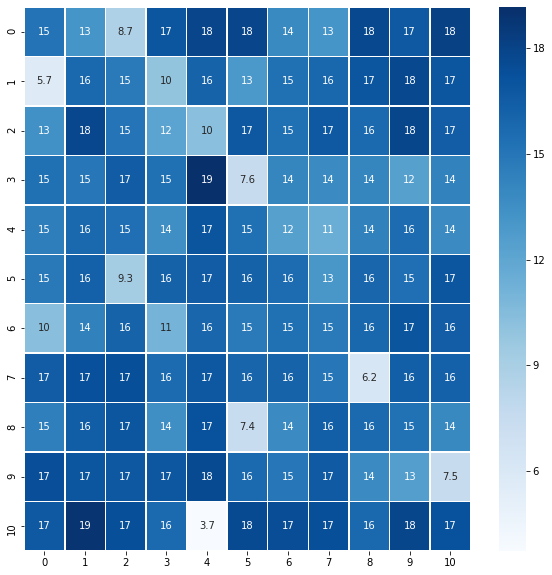

In [10]:
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(matrix, annot=True, cmap='Blues', linewidths=.5, ax=ax)

In [22]:
'''
data = matrix
mask = np.diag(np.ones(data.shape[1]))
masked_data = np.ma.masked_array(data,mask)


fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(matrix, annot=True, cmap='Blues', linewidths=.5, ax=ax)

''';

In [11]:
names_excel_europe = [
"Issues after deleting facebook account (e.g, new account makes old facebook accounts suggestion, facebook account was deleted by irrational reasons)",
"Cambridge analytica interfered on UK referendum (brexit)",
"Facebook has move users out of reach of european privacy law to dodge GDPR",
"Bigdata (Big data companies and big data solutions)",
"Promote social networks accounts",
"Mark zuckerberg hearing (EU and US parliament)",
"Inteligence Artificial on the industry",
"News about data privacy breaches on Facebook",
"Relationship between  Scottish National party (snp) and Cambridge Analytica",
"Discussion about Facebook company's practices",
"People share and discuss different articles thay they read (some of them related to privacy)"
]

In [12]:
names_excel_northamerica = [
    'Delete of content on Facebook (account, messages, photos,…)',
    "Comments about Mark zuckerberg",
    "Intelligence Artificial as a bussiness or service",
    "Facebook is censonring speech",
    "Facebook share information with other companies",
    "Privacy, as a problem that must be resolved // People problems ?",
    "Facebook and privacy regulations (such as GDPR)",
    "Discussion about Fake news",
    "US election was intervened (by Russia and Cambridge Analytica)",
    "Trump and inmigration policies (separating child from families)",
    "PC gaming streaming and Zuckerberg's hearing"    
]

In [18]:

def re_sorted_names_excel(new_order, names_excel):
    final_names_excel = [None]*len(names_excel)
    i = 0
    for elem in new_order:
        final_names_excel[elem-1] = names_excel[i]
        i+=1
    return final_names_excel


In [22]:
new_order_europe = get_new_order_topic(PreparedData_dict_with_more_info_collection_1)
final_order_names_europe = re_sorted_names_excel(new_order_europe, names_excel_europe)

new_order_northamerica = get_new_order_topic(PreparedData_dict_with_more_info_collection_2)
final_order_names_northamerica = re_sorted_names_excel(new_order_northamerica, names_excel_northamerica)


In [24]:
#check order
'''
topic_id_i = 0
tinfo_collection_1.loc[tinfo_collection_1['Category'] == 'Topic'+str(topic_id_i+1)].sort_values(by='relevance', ascending=False)['Term']
''';

Text(68.99999999999996, 0.5, 'Europe')

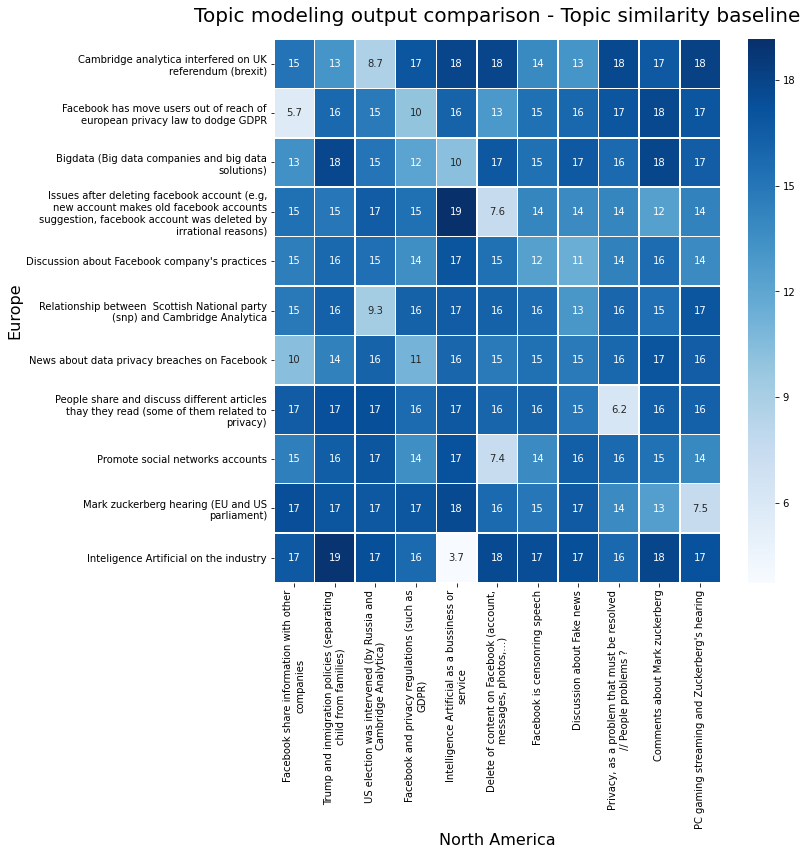

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
max_width = 45


fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(matrix, annot=True, cmap='Blues', linewidths=.5, ax=ax, xticklabels=final_order_names_northamerica, yticklabels=final_order_names_europe)
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.set_yticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_yticklabels())
plt.title("Topic modeling output comparison - Topic similarity baseline", fontsize = 20, y = 1.02)
plt.xlabel('North America', fontsize=16)
plt.ylabel('Europe', fontsize=16)